In [297]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [298]:
results = pd.read_csv('results.csv')
results = results.query("simp_algorithm == ['OS','RDP','VW','BU']")
results["dataset"] = results["dataset"].apply(lambda x: x.replace("TEST_normalized", ""))
results["model"] = results["model"].apply(lambda x: x.split(".")[0].replace("_norm", ""))
results.head(5)

,dataset,model,simp_algorithm,performance,"knee(x,y)",time
1,ProximalPhalanxOutlineCorrect,logistic-regression,BU,0.914798,"(0.04443037974683545, 0.0)",0.282440
2,ProximalPhalanxOutlineCorrect,logistic-regression,VW,0.796375,"(1.0, 1.0)",0.016343
3,ProximalPhalanxOutlineCorrect,logistic-regression,RDP,0.887694,"(0.13151898734177217, 1.0)",0.564307
6,ItalyPowerDemand,logistic-regression,BU,0.914798,"(0.14608695652173911, 0.4471744471744472)",0.051812
8,MoteStrain,decision-tree,BU,0.914798,"(1.0120481927710847, 1.0)",0.310772


In [299]:
datasets_paths = [dir for dir in os.listdir('.') if os.path.isdir(dir)]
models_paths = [os.path.join(dir, 'models.csv') for dir in datasets_paths if os.path.isfile(os.path.join(dir, 'models.csv'))]
datasets_models = dict(zip(datasets_paths, models_paths))
datasets_models = {dataset: pd.read_csv(path) for dataset, path in datasets_models.items()}

models_df = pd.DataFrame()
for dataset, models in datasets_models.items():
    models['dataset'] = dataset
    models_df = pd.concat([models_df, models], ignore_index=True)

#models_df["train_acc"] = models_df["train_acc"].astype(float)
#models_df["val_acc"] = models_df["val_acc"].astype(float)
#models_df["test_acc"] = models_df["test_acc"].astype(float)
print(models_df.head(6))


            model_type  train_acc   val_acc  test_acc                dataset
0        decision-tree   0.777778  0.200000  0.527253                    CBF
1  logistic-regression   0.777778  0.200000  0.330367                    CBF
2                  knn   1.000000  0.600000  0.760845                    CBF
3                  cnn   0.973889  0.394000  0.912125                    CBF
4        decision-tree   1.000000  0.333333  0.600000  SonyAIBORobotSurface1
5  logistic-regression   0.750000  0.333333  0.430000  SonyAIBORobotSurface1


In [300]:
metadata = pd.read_csv("../data/DataSummary.csv")
metadata = metadata.rename(columns={"Name": "dataset"})
metadata = metadata.drop("Data donor/editor", axis=1)
print(metadata.head(5))


   ID       Type    dataset  Train   Test   Class  Length  ED (w=0)  \
0   1      Image      Adiac     390    391     37     176    0.3887   
1  90  Simulated        BME      30    150      3     128    0.1667   
2   7  Simulated        CBF      30    900      3     128    0.1478   
3  91    Traffic  Chinatown      20    343      2      24    0.0466   
4  92      Image       Crop    7200  16800     24      46    0.2883   

  DTW (learned_w)   DTW (w=100)  Default rate  
0       0.3913 (3)       0.3964        0.9591  
1       0.0200 (4)       0.1000        0.6667  
2      0.0044 (11)       0.0033        0.6644  
3       0.0466 (0)       0.0437        0.2741  
4       0.2883 (0)       0.3348        0.9583  


## All Results

In [301]:
datasets = [dataset.replace("TEST_normalized", "") for dataset in results['dataset'].unique()]
print(f"List of all Datasets {' '.join(datasets)}")
print(f"Number of Datasets: {len(results['dataset'].unique())}")
print(results['model'].unique())
print(len(results['model'].unique()))
print(results['simp_algorithm'].unique())
print(len(results['simp_algorithm'].unique()))

List of all Datasets ProximalPhalanxOutlineCorrect ItalyPowerDemand MoteStrain GunPointOldVersusYoung MiddlePhalanxTW ECG200 SonyAIBORobotSurface1 ElectricDevices BME Chinatown DistalPhalanxOutlineAgeGroup MedicalImages TwoPatterns UMD ECG5000 TwoLeadECG GunPointAgeSpan MiddlePhalanxOutlineAgeGroup ProximalPhalanxOutlineAgeGroup ProximalPhalanxTW SmoothSubspace Plane ECGFiveDays GunPoint PowerCons GunPointMaleVersusFemale PhalangesOutlinesCorrect DistalPhalanxOutlineCorrect Wafer Crop FaceAll Adiac SyntheticControl
Number of Datasets: 33
['logistic-regression' 'decision-tree' 'knn' 'cnn']
4
['BU' 'VW' 'RDP' 'OS']
4


#### Sum AULC

In [302]:
os_alg_sum_all = results.query('simp_algorithm == "OS"')["performance"].sum()
rdp_alg_sum_all = results.query('simp_algorithm == "RDP"')["performance"].sum()
bu_alg_sum_all = results.query('simp_algorithm == "BU"')["performance"].sum()
vw_alg_sum_all = results.query('simp_algorithm == "VW"')["performance"].sum()
print("Sum of AULC per algorithm")
print("OS: ", os_alg_sum_all)
print("RDP: ", rdp_alg_sum_all)
print("BU: ", bu_alg_sum_all)
print("VW: ", vw_alg_sum_all)

Sum of AULC per algorithm
OS:  66.88775358397312
RDP:  68.4059504331612
BU:  70.20703658323066
VW:  62.75831974466704


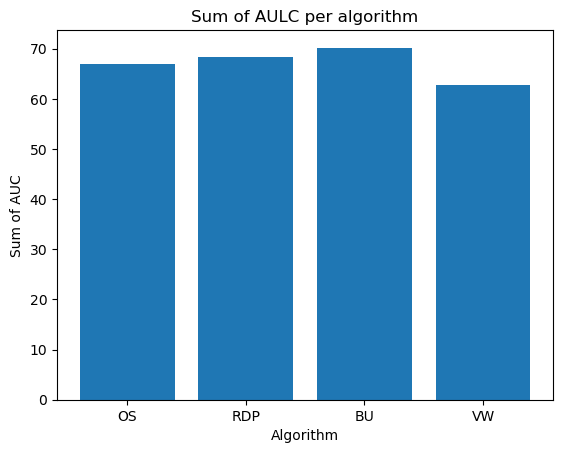

In [303]:
sum_auc = [os_alg_sum_all, rdp_alg_sum_all, bu_alg_sum_all, vw_alg_sum_all]
plt.bar(['OS', 'RDP', 'BU', 'VW'],sum_auc)
plt.title('Sum of AULC per algorithm')
plt.xlabel('Algorithm')
plt.ylabel('Sum of AUC')
plt.show()

#### Mean AULC

In [304]:
os_alg_mean_all = results.query('simp_algorithm == "OS"')["performance"].mean()
rdp_alg_mean_all = results.query('simp_algorithm == "RDP"')["performance"].mean()
bu_alg_mean_all = results.query('simp_algorithm == "BU"')["performance"].mean()
vw_alg_mean_all = results.query('simp_algorithm == "VW"')["performance"].mean()
print("Mean of AULC per algorithm")
print("OS: ", os_alg_mean_all)
print("RDP: ", rdp_alg_mean_all)
print("BU: ", bu_alg_mean_all)
print("VW: ", vw_alg_mean_all)

Mean of AULC per algorithm
OS:  0.891836714452975
RDP:  0.8883889666644311
BU:  0.9117796958861125
VW:  0.8150431135671045


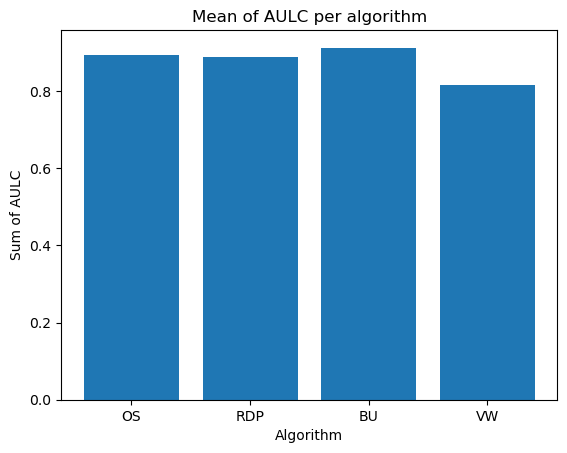

In [305]:
sum_auc = [os_alg_mean_all, rdp_alg_mean_all, bu_alg_mean_all, vw_alg_mean_all]
plt.bar(['OS', 'RDP', 'BU', 'VW'],sum_auc)
plt.title('Mean of AULC per algorithm')
plt.xlabel('Algorithm')
plt.ylabel('Sum of AULC')
plt.show()

#### Mean AULC Per Alg and Model

In [306]:
os_alg_all_per_model = results.query('simp_algorithm == "OS"').groupby("model")["performance"].mean()
rdp_alg_all_per_model = results.query('simp_algorithm == "RDP"').groupby("model")["performance"].mean()
bu_alg_all_per_model = results.query('simp_algorithm == "BU"').groupby("model")["performance"].mean()
vw_alg_all_per_model = results.query('simp_algorithm == "VW"').groupby("model")["performance"].mean()
print("Mean of AUC per algorithm and model")
print("OS: ", os_alg_all_per_model)
print("RDP: ", rdp_alg_all_per_model)
print("BU: ", bu_alg_all_per_model)
print("VC: ", vw_alg_all_per_model)

Mean of AUC per algorithm and model
OS:  model
cnn                    0.895145
decision-tree          0.890280
knn                    0.890280
logistic-regression    0.890280
Name: performance, dtype: float64
RDP:  model
cnn                    0.889924
decision-tree          0.887694
knn                    0.887694
logistic-regression    0.887694
Name: performance, dtype: float64
BU:  model
cnn                    0.905114
decision-tree          0.914798
knn                    0.914798
logistic-regression    0.914798
Name: performance, dtype: float64
VC:  model
cnn                    0.856268
decision-tree          0.796375
knn                    0.796375
logistic-regression    0.796375
Name: performance, dtype: float64


/tmp/ipykernel_104356/2727764743.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0, 0].set_xticklabels(os_alg_all_per_model.index, rotation=10)
/tmp/ipykernel_104356/2727764743.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0, 1].set_xticklabels(os_alg_all_per_model.index, rotation=10)
/tmp/ipykernel_104356/2727764743.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1, 0].set_xticklabels(bu_alg_all_per_model.index, rotation=10)
/tmp/ipykernel_104356/2727764743.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1, 1].set_xticklabels(vw_alg_all_per_model.index, rotation=10)


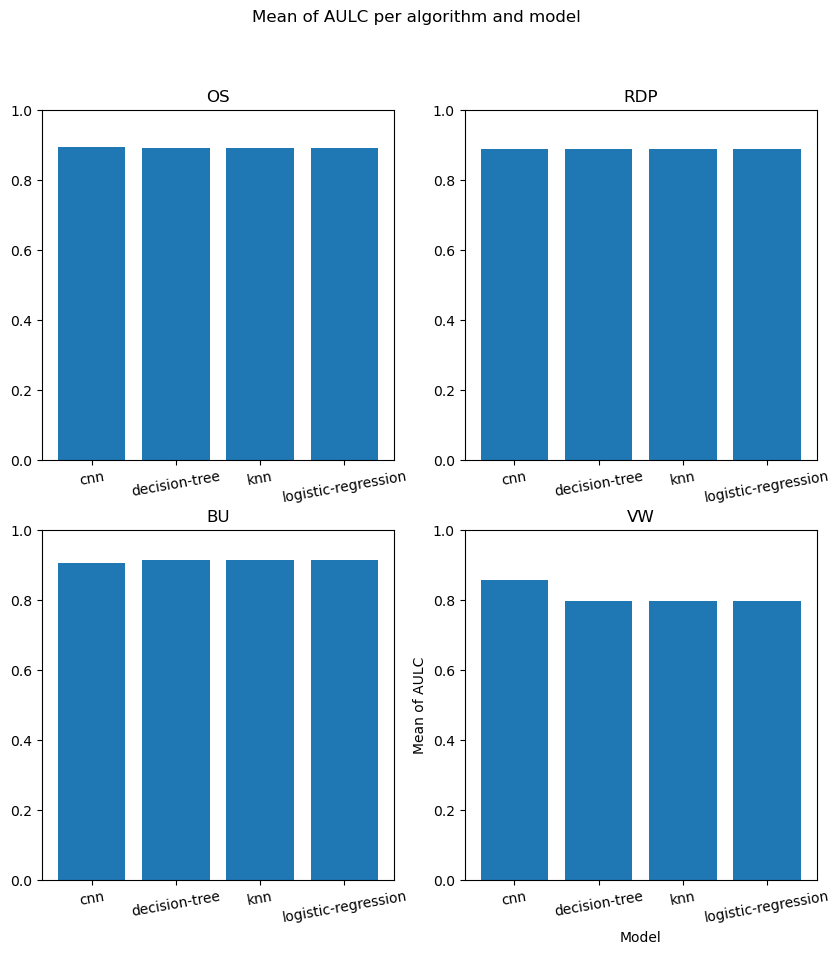

In [307]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax[0, 0].bar(os_alg_all_per_model.index, os_alg_all_per_model.values)
ax[0, 0].set_title('OS')
ax[0, 0].set_xticklabels(os_alg_all_per_model.index, rotation=10)
ax[0, 0].set_ylim(0, 1)

ax[0, 1].bar(rdp_alg_all_per_model.index, rdp_alg_all_per_model.values)
ax[0, 1].set_xticklabels(os_alg_all_per_model.index, rotation=10)
ax[0, 1].set_title('RDP')
ax[0, 1].set_ylim(0, 1)

ax[1, 0].bar(bu_alg_all_per_model.index, bu_alg_all_per_model.values)
ax[1, 0].set_xticklabels(bu_alg_all_per_model.index, rotation=10)
ax[1, 0].set_title('BU')
ax[1, 0].set_ylim(0, 1)

ax[1, 1].bar(vw_alg_all_per_model.index, vw_alg_all_per_model.values)
ax[1, 1].set_xticklabels(vw_alg_all_per_model.index, rotation=10)
ax[1, 1].set_title('VW')
ax[1, 1].set_ylim(0, 1)

plt.suptitle('Mean of AULC per algorithm and model')
plt.xlabel('Model')
plt.ylabel('Mean of AULC')
plt.show()


## Model Performance

In [308]:
#Perfromance of models
models_mean_perf_train = models_df.groupby("model_type")["train_acc"].mean()
models_mean_perf_train

model_type
cnn                    0.911976
decision-tree          0.667024
knn                    0.999654
logistic-regression    0.563943
Name: train_acc, dtype: float64

#### Train Accuracy

Text(0, 0.5, 'Mean of Train Accuracy')

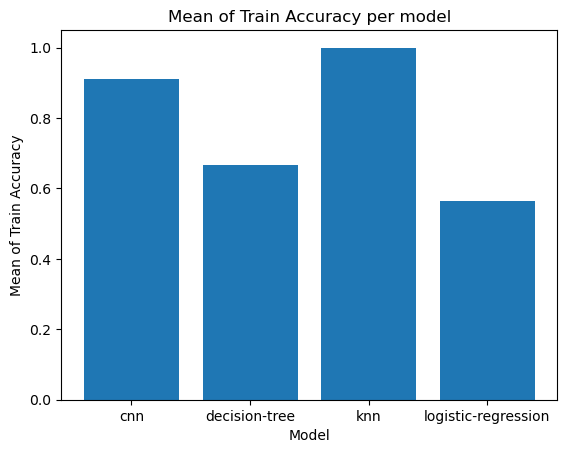

In [309]:
plt.bar(models_mean_perf_train.index, models_mean_perf_train.values) #type: ignore 
plt.title('Mean of Train Accuracy per model')
plt.xlabel('Model')
plt.ylabel('Mean of Train Accuracy')

#### Validation Accuracy

In [310]:
models_mean_perf_val = models_df.groupby("model_type")["val_acc"].mean()
models_mean_perf_val

model_type
cnn                    0.722830
decision-tree          0.453751
knn                    0.641949
logistic-regression    0.460965
Name: val_acc, dtype: float64

Text(0, 0.5, 'Mean of Validation Accuracy')

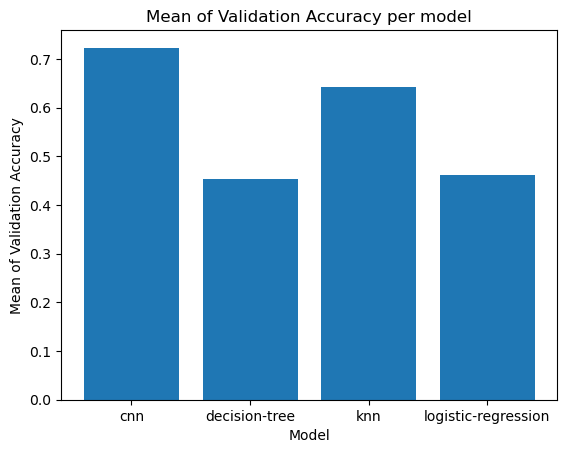

In [311]:
plt.bar(models_mean_perf_val.index, models_mean_perf_val.values)    #type: ignore
plt.title('Mean of Validation Accuracy per model')
plt.xlabel('Model')
plt.ylabel('Mean of Validation Accuracy')

### By Class

In [312]:
dataset_class = metadata[["dataset", "Class"]].to_dict()
dataset_class_dict = pd.Series(metadata["Class"].values, index=metadata["dataset"].values).to_dict()
print(dataset_class_dict)
#models_df["class"] = models_df["dataset"].map()

{'Adiac': 37, 'BME': 3, 'CBF': 3, 'Chinatown': 2, 'Crop': 24, 'DistalPhalanxOutlineAgeGroup': 3, 'DistalPhalanxOutlineCorrect': 2, 'DistalPhalanxTW': 6, 'ECG200': 2, 'ECG5000': 5, 'ECGFiveDays': 2, 'ElectricDevices': 7, 'FaceAll': 14, 'FacesUCR': 14, 'GunPoint': 2, 'GunPointAgeSpan': 2, 'GunPointMaleVersusFemale': 2, 'GunPointOldVersusYoung': 2, 'ItalyPowerDemand': 2, 'MedicalImages': 10, 'MiddlePhalanxOutlineAgeGroup': 3, 'MiddlePhalanxOutlineCorrect': 2, 'MiddlePhalanxTW': 6, 'MoteStrain': 2, 'PhalangesOutlinesCorrect': 2, 'Plane': 7, 'PowerCons': 2, 'ProximalPhalanxOutlineAgeGroup': 3, 'ProximalPhalanxOutlineCorrect': 2, 'ProximalPhalanxTW': 6, 'SmoothSubspace': 3, 'SonyAIBORobotSurface1': 2, 'SonyAIBORobotSurface2': 2, 'SwedishLeaf': 15, 'SyntheticControl': 6, 'TwoLeadECG': 2, 'TwoPatterns': 4, 'UMD': 3, 'Wafer': 2}


In [313]:
models_class_df = models_df
models_class_df["class"] = models_class_df["dataset"].map(dataset_class_dict)
models_class_df

,model_type,train_acc,val_acc,test_acc,dataset,class
0,decision-tree,0.777778,0.200000,0.527253,CBF,3
1,logistic-regression,0.777778,0.200000,0.330367,CBF,3
2,knn,1.000000,0.600000,0.760845,CBF,3
3,cnn,0.973889,0.394000,0.912125,CBF,3
4,decision-tree,1.000000,0.333333,0.600000,SonyAIBORobotSurface1,2
...,...,...,...,...,...,...
150,cnn,0.789294,0.744531,0.579710,DistalPhalanxTW,6
151,decision-tree,1.000000,1.000000,0.996815,GunPointOldVersusYoung,2
152,logistic-regression,1.000000,1.000000,1.000000,GunPointOldVersusYoung,2
153,knn,1.000000,1.000000,1.000000,GunPointOldVersusYoung,2


#### Train Accuracy

In [314]:
models_mean_perf_train_per_class = models_class_df
models_mean_perf_train_per_class = models_mean_perf_train_per_class.groupby(["model_type", "class"])["train_acc"].mean()

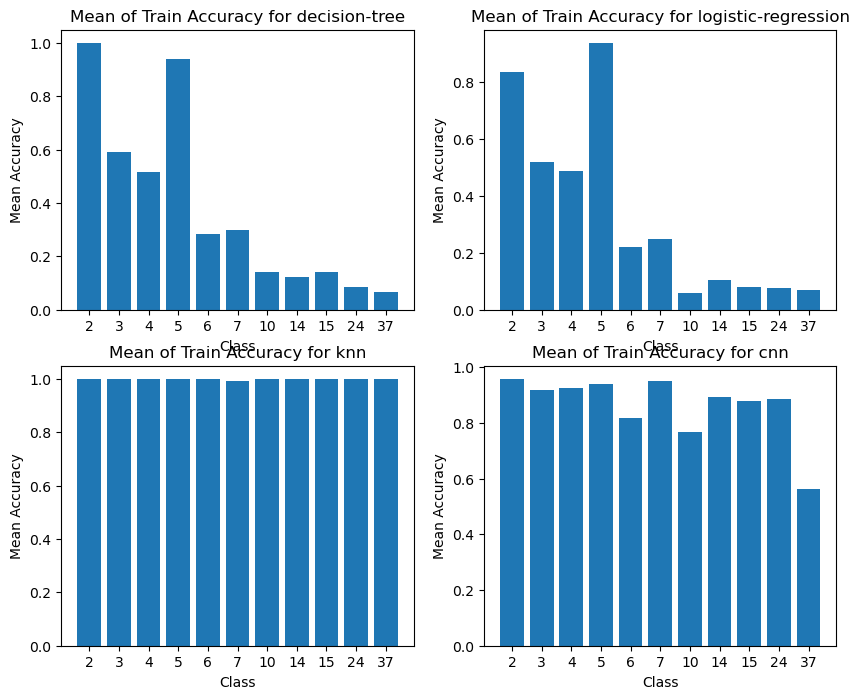

In [315]:
models = models_class_df["model_type"].unique()
num_cols = 2
num_rows = (len(set(models)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, model in enumerate(models):
    model_data = models_mean_perf_train_per_class[model]
    
    x_values = model_data.index.tolist()
    x_values = [str(value) for value in x_values]
    y_values = model_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    
    ax.bar(x_values, y_values)
    ax.set_title(f'Mean of Train Accuracy for {model}')
    ax.set_xlabel('Class')
    ax.set_ylabel('Mean Accuracy')

plt.show()

#### Validation Accuracy

In [316]:
models_mean_perf_val_per_class = models_class_df
models_mean_perf_val_per_class = models_mean_perf_val_per_class.groupby(["model_type", "class"])["val_acc"].mean()

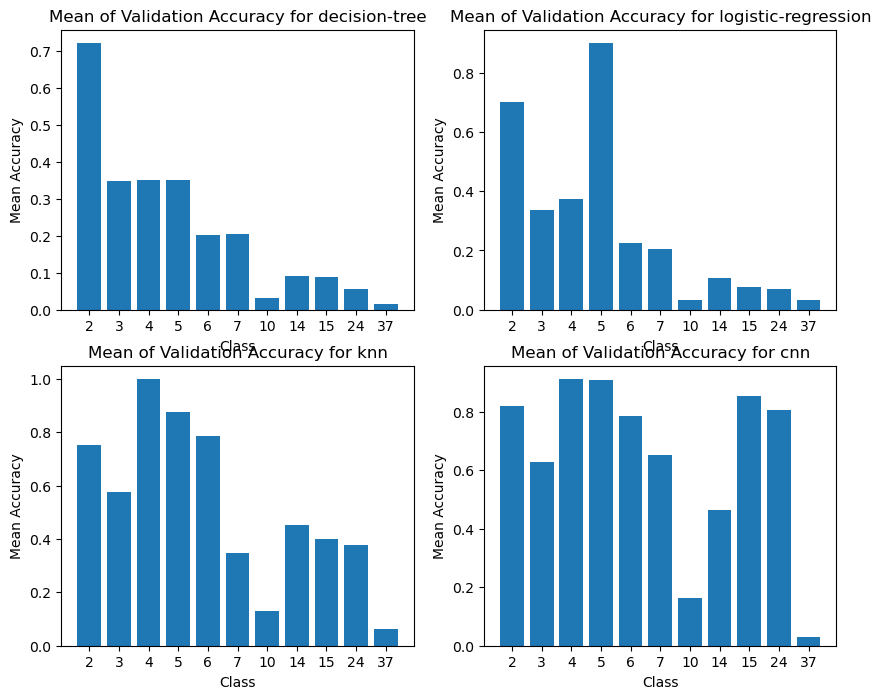

In [317]:
models = models_class_df["model_type"].unique()
num_cols = 2
num_rows = (len(set(models)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, model in enumerate(models):
    model_data = models_mean_perf_val_per_class[model]
    
    x_values = model_data.index.tolist()
    x_values = [str(value) for value in x_values]
    y_values = model_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    
    ax.bar(x_values, y_values)
    ax.set_title(f'Mean of Validation Accuracy for {model}')
    ax.set_xlabel('Class')
    ax.set_ylabel('Mean Accuracy')

plt.show()

## Only for CNN

In [318]:
results_cnn = results.query('model == "cnn"')

#### Sum AULC

In [319]:
os_alg_sum_cnn = results_cnn.query('simp_algorithm == "OS"')["performance"].sum()
rdp_alg_sum_cnn = results_cnn.query('simp_algorithm == "RDP"')["performance"].sum()
bu_alg_sum_cnn = results_cnn.query('simp_algorithm == "BU"')["performance"].sum()
vw_alg_sum_cnn = results_cnn.query('simp_algorithm == "VW"')["performance"].sum()
print("Sum of AULC per algorithm")
print("OS: ", os_alg_sum_cnn)
print("RDP: ", rdp_alg_sum_cnn)
print("BU: ", bu_alg_sum_cnn)
print("VW: ", vw_alg_sum_cnn)

Sum of AULC per algorithm
OS:  21.48348744560569
RDP:  21.35817641707807
BU:  21.722727702753033
VW:  20.55042837612674


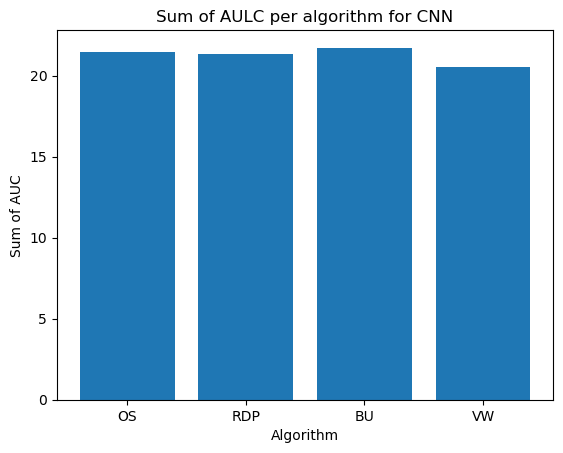

In [320]:
sum_auc = [os_alg_sum_cnn, rdp_alg_sum_cnn, bu_alg_sum_cnn, vw_alg_sum_cnn]
plt.bar(['OS', 'RDP', 'BU', 'VW'],sum_auc)
plt.title('Sum of AULC per algorithm for CNN')
plt.xlabel('Algorithm')
plt.ylabel('Sum of AUC')
plt.show()

#### Mean AULC

In [321]:
os_alg_mean_cnn = results_cnn.query('simp_algorithm == "OS"')["performance"].mean()
rdp_alg_mean_cnn = results_cnn.query('simp_algorithm == "RDP"')["performance"].mean()
bu_alg_mean_cnn = results_cnn.query('simp_algorithm == "BU"')["performance"].mean()
vw_alg_mean_cnn = results_cnn.query('simp_algorithm == "VW"')["performance"].mean()
print("Mean of AUC per algorithm")
print("OS: ", os_alg_mean_cnn)
print("RDP: ", rdp_alg_mean_cnn)
print("BU: ", bu_alg_mean_cnn)
print("VW: ", vw_alg_mean_cnn)

Mean of AUC per algorithm
OS:  0.8951453102335704
RDP:  0.8899240173782529
BU:  0.9051136542813764
VW:  0.8562678490052807


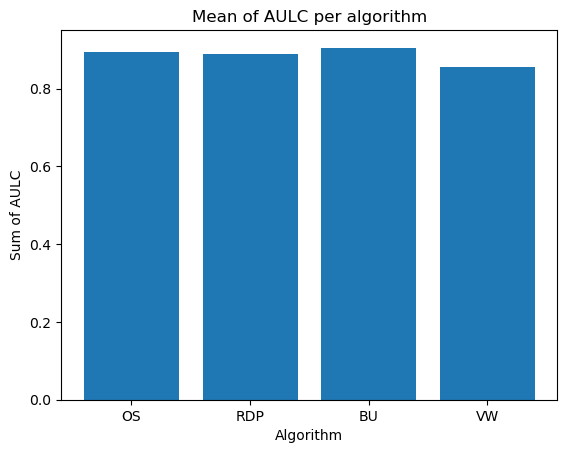

In [322]:
sum_auc = [os_alg_mean_cnn, rdp_alg_mean_cnn, bu_alg_mean_cnn, vw_alg_mean_cnn]
plt.bar(['OS', 'RDP', 'BU', 'VW'],sum_auc)
plt.title('Mean of AULC per algorithm')
plt.xlabel('Algorithm')
plt.ylabel('Sum of AULC')
plt.show()

### By Class:

In [323]:
results_cnn_class = results_cnn
results_cnn_class["class"] = results_cnn_class["dataset"].map(dataset_class_dict)
#print(results_cnn_class.head(5))

/tmp/ipykernel_104356/3098996261.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_cnn_class["class"] = results_cnn_class["dataset"].map(dataset_class_dict)


#### AULC Per Alg and Class

In [324]:
results_cnn_alg_class = results_cnn_class.groupby(["simp_algorithm", "class"])["class"].count()
#print(results_cnn_alg_class)

In [325]:
results_cnn_alg_class_mean = results_cnn_class.groupby(["simp_algorithm", "class"])["performance"].mean()
#print(results_cnn_alg_class_mean)
results_cnn_alg_class_std = results_cnn_class.groupby(["simp_algorithm", "class"])["performance"].std()
#print(results_cnn_alg_class_std)


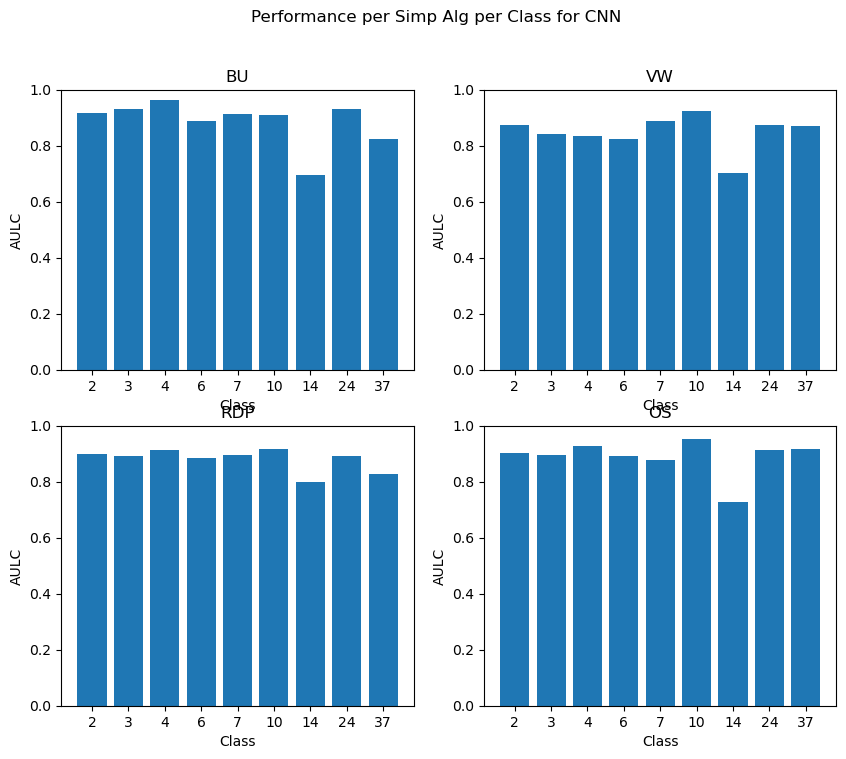

In [326]:
simp_algs = results_cnn_class["simp_algorithm"].unique()
num_cols = 2
num_rows = (len(set(simp_algs)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, alg in enumerate(simp_algs):
    simp_alg_data = results_cnn_alg_class_mean[alg]
    
    x_values = simp_alg_data.index.tolist()
    x_values = [str(value) for value in x_values]
    y_values = simp_alg_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    
    ax.bar(x_values, y_values)
    
    ax.set_title(f'{alg}')
    ax.set_xlabel('Class')
    ax.set_ylabel('AULC')
    ax.set_ylim(0.0, 1.0)

plt.suptitle("Performance per Simp Alg per Class for CNN")
plt.show()

Binary vs Multicalss

In [327]:
results_cnn_class["class_type"] = results_cnn_class["class"].copy().apply(lambda x: 'binary' if x == 2 else "multiclass")
results_cnn_alg_bin_vs_mc_mean = results_cnn_class.groupby(["simp_algorithm", "class_type"])["performance"].mean()
print(results_cnn_alg_bin_vs_mc_mean)

simp_algorithm  class_type
BU              binary        0.916721
                multiclass    0.898149
OS              binary        0.903488
                multiclass    0.890140
RDP             binary        0.900557
                multiclass    0.883544
VW              binary        0.875273
                multiclass    0.844865
Name: performance, dtype: float64


/tmp/ipykernel_104356/705144334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_cnn_class["class_type"] = results_cnn_class["class"].copy().apply(lambda x: 'binary' if x == 2 else "multiclass")


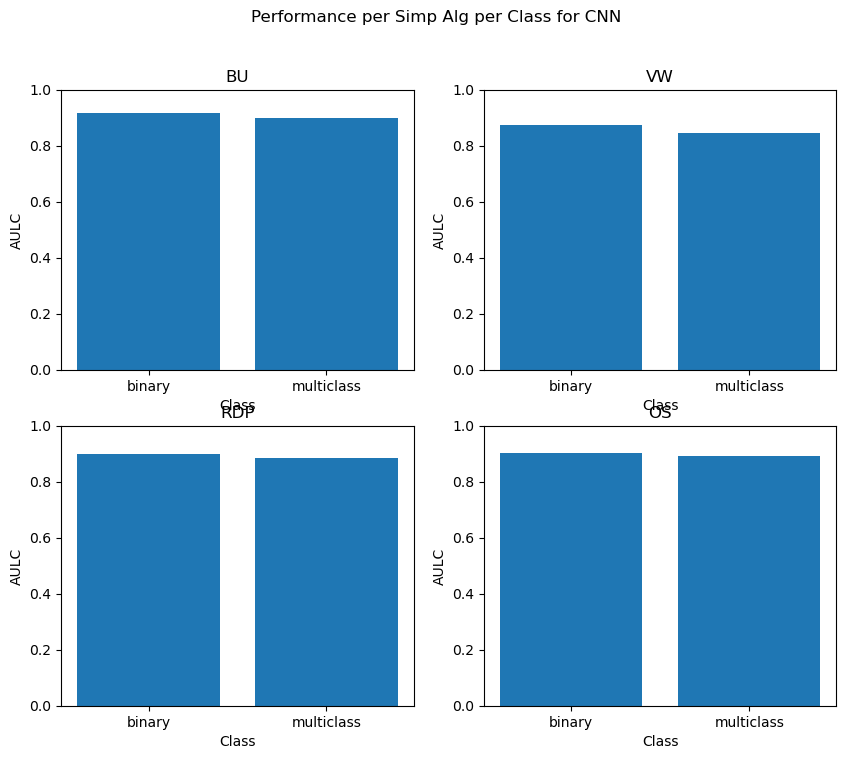

In [328]:
simp_algs = results_cnn_class["simp_algorithm"].unique()
num_cols = 2
num_rows = (len(set(simp_algs)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, alg in enumerate(simp_algs):
    simp_alg_data = results_cnn_alg_bin_vs_mc_mean[alg]
    
    x_values = simp_alg_data.index.tolist()
    x_values = [str(value) for value in x_values]
    y_values = simp_alg_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    
    ax.bar(x_values, y_values)
    
    ax.set_title(f'{alg}')
    ax.set_xlabel('Class')
    ax.set_ylabel('AULC')
    ax.set_ylim(0.0, 1.0)

plt.suptitle("Performance per Simp Alg per Class for CNN")
plt.show()

### By length

In [329]:
dataset_lendth = metadata[["dataset", "Length"]].to_dict()
dataset_length_dict = pd.Series(metadata["Length"].values, index=metadata["dataset"].values).to_dict()
#print(dataset_length_dict)
#models_df["class"] = models_df["dataset"].map()

In [330]:
results_cnn_length = results_cnn
results_cnn_length["length"] = results_cnn_length["dataset"].map(dataset_length_dict).copy()
#print(results_cnn_length.head(5))

/tmp/ipykernel_104356/2137824416.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_cnn_length["length"] = results_cnn_length["dataset"].map(dataset_length_dict).copy()


In [331]:
results_cnn_alg_length_mean = results_cnn_length.groupby(["simp_algorithm", "length"])["performance"].mean()
#print(results_cnn_alg_length_mean)

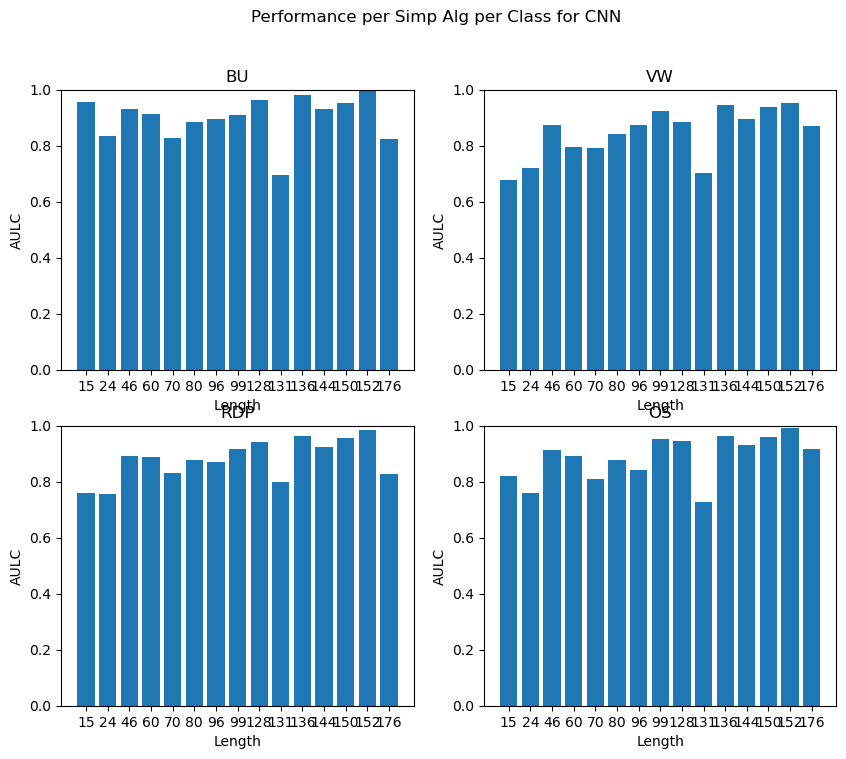

In [332]:
simp_algs = results_cnn_class["simp_algorithm"].unique()
num_cols = 2
num_rows = (len(set(simp_algs)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, alg in enumerate(simp_algs):
    simp_alg_data = results_cnn_alg_length_mean[alg]
    
    x_values = simp_alg_data.index.tolist()
    x_values = [str(value) for value in x_values]
    y_values = simp_alg_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    
    ax.bar(x_values, y_values)
    
    ax.set_title(f'{alg}')
    ax.set_xlabel('Length')
    ax.set_ylabel('AULC')
    ax.set_ylim(0.0, 1.0)

plt.suptitle("Performance per Simp Alg per Class for CNN")
plt.show()

Model performance vs AUC

We can define the difficulty of a problem by the perfromance of the model. If the model scores really well, then the problem seems liley to be easy. If instead it works terribly bad, it would then be more difficult.

In [333]:
models_df_cnn = models_df.loc[models_df["model_type"] == "cnn"]
#model_cnn_perf = models_df_cnn[["dataset", "val_acc"]].to_dict()

model_cnn_perf = pd.Series(models_df_cnn["val_acc"].values, index=models_df_cnn["dataset"].values).to_dict()
#print(models_df_cnn)
results_perf_length = results_cnn.copy()
results_perf_length["model_acc"] = results_perf_length["dataset"].map(model_cnn_perf)

results_perf_length_mean = results_perf_length.groupby(["simp_algorithm", "length"])["model_acc"].mean()

In [334]:
simp_algs = results_cnn_class["simp_algorithm"].unique()
num_cols = 2
num_rows = (len(set(simp_algs)) + 1)//2
#fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, alg in enumerate(simp_algs):
    simp_alg_data = results_perf_length_mean[alg]
    
    x_values = simp_alg_data.index.tolist()
    x_values = [str(value) for value in x_values]
    y_values = simp_alg_data.values.tolist()

    #ax = fig.add_subplot(num_rows, num_cols, i+1)
    
    #ax.bar(x_values, y_values)
    
    #ax.set_title(f'{alg}')
    #ax.set_xlabel('Class')
    #ax.set_ylabel('Model Accuracy')
    #ax.set_ylim(0.0, 1.0)

#plt.suptitle("Performance per Simp Alg per Class for CNN")
#plt.show()

## "Optimal" Knee

In [335]:
datasets = results_cnn['dataset'].unique()

for dataset in datasets:
    dat_df = results_cnn.query(f'dataset == "{dataset}"')
    simp_algorithms = dat_df['simp_algorithm']
    #print(simp_algorithms)
    knees_df = dat_df["knee(x,y)"]
    #comb = zip(simp_algorithms, knees_df)
    knees = [[float(knee.replace("(", "").replace(")", "").split(",")[0]), float(knee.replace("(", "").replace(")", "").split(",")[1])] for knee in knees_df]

    x_values = [x for x, y in knees]
    y_values = [y for x, y in knees]

    min_x = min(x_values)
    min_x_index = x_values.index(min_x)
    y = y_values[min_x_index]

    y_max = max(y_values)
    if y == y_max:
        #sim_alg = simp_algorithms[min_x_index]
        print(f"Best model for {dataset} is {dat_df['model'].values[0]}, simp alg.  with AUC {y} at knee points {min_x, y}")
    

Best model for ECGFiveDays is cnn, simp alg.  with AUC 1.0 at knee points (0.03860294117647054, 1.0)
Best model for Wafer is cnn, simp alg.  with AUC 1.0 at knee points (0.016447368421052613, 1.0)
